In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import BernoulliNB , GaussianNB ,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\91820\Desktop\Main-IPL\IPL Matches 2008-2020.csv')

df = df[['team1' , 'team2' , 'venue' , 'toss_winner' ,'toss_decision' , 'winner' , 'neutral_venue']]

In [3]:
df.head()

,team1,team2,venue,toss_winner,toss_decision,winner,neutral_venue
0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,0
1,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,0
2,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,0
3,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,0
4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,0


In [4]:
df.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [5]:
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [6]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad' , 'Delhi Capitals']

consistent_venues = ['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens', 'Dr DY Patil Sports Academy', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Himachal Pradesh Cricket Association Stadium', 'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal', 'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'M.Chinnaswamy Stadium', 'Holkar Cricket Stadium', 'Vidarbha Cricket Association Stadium, Jamtha', 'Nehru Stadium',
       'Saurashtra Cricket Association Stadium']

In [7]:
df = df[(df['team1'].isin(consistent_teams)) & (df['team2'].isin(consistent_teams)) & (df['neutral_venue']==0) & (df['venue'].isin(consistent_venues))]

In [8]:
df.drop('neutral_venue', inplace=True , axis=1)

In [9]:
# delhi capitals and delhi daredevils are same team
df.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Rajasthan Royals',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Delhi Capitals'], dtype=object)

In [10]:
df['team1'] = np.where(df.team1 == 'Delhi Daredevils' , 'Delhi Capitals' , df.team1)
df['team2'] = np.where(df.team2 == 'Delhi Daredevils' , 'Delhi Capitals' , df.team2)
df['toss_winner'] = np.where(df.toss_winner == 'Delhi Daredevils' , 'Delhi Capitals' , df.toss_winner)
df['winner'] = np.where(df.winner == 'Delhi Daredevils' , 'Delhi Capitals' , df.winner)

In [11]:
# M Chinnaswamy Stadium and M.Chinnaswamy Stadium are same team
# Punjab Cricket Association IS Bindra Stadium, Mohali and Punjab Cricket Association Stadium, Mohali are same
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Barabati Stadium',
       'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'M.Chinnaswamy Stadium', 'Holkar Cricket Stadium'], dtype=object)

In [12]:
df['venue'] = np.where(df.venue == 'M.Chinnaswamy Stadium' , 'M Chinnaswamy Stadium' , df.venue)
df['venue'] = np.where(df.venue == 'Punjab Cricket Association IS Bindra Stadium, Mohali' , 'Punjab Cricket Association Stadium, Mohali' , df.venue)

In [13]:
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Barabati Stadium',
       'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Holkar Cricket Stadium'], dtype=object)

In [14]:
df.head()

,team1,team2,venue,toss_winner,toss_decision,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings
2,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Capitals
3,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore
5,Rajasthan Royals,Kings XI Punjab,Sawai Mansingh Stadium,Kings XI Punjab,bat,Rajasthan Royals


In [15]:
def getNumber_team(x):
    if x=='Royal Challengers Bangalore':
        return 0
    elif x=='Kings XI Punjab':
        return 1
    elif x=='Delhi Capitals':
        return 2
    elif x=='Mumbai Indians':
        return 3     
    elif x=='Rajasthan Royals':
        return 4
    elif x=='Chennai Super Kings':
        return 5
    elif x=='Kolkata Knight Riders':
        return 6
    else:
        return 7

In [16]:
df['team1'] = df['team1'].apply(getNumber_team)
df['team2'] = df['team2'].apply(getNumber_team)
df['toss_winner'] = df['toss_winner'].apply(getNumber_team)
df['winner'] = df['winner'].apply(getNumber_team)

In [17]:
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Barabati Stadium',
       'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Holkar Cricket Stadium'], dtype=object)

In [18]:
def getNumber_venue(x):
    if x=='M Chinnaswamy Stadium':
        return 1
    elif x=='Punjab Cricket Association Stadium, Mohali':
        return 2
    elif x=='Feroz Shah Kotla':
        return 3
    elif x=='Wankhede Stadium':
        return 4
    elif x=='Sawai Mansingh Stadium':
        return 5
    elif x=='MA Chidambaram Stadium, Chepauk':
        return 6
    elif x=='Eden Gardens':
        return 7
    elif x=='Dr DY Patil Sports Academy':
        return 8
    elif x=='Brabourne Stadium':
        return 9
    elif x=='Sardar Patel Stadium, Motera':
        return 10 
    elif x=='Himachal Pradesh Cricket Association Stadium':
        return 11
    elif x=='Subrata Roy Sahara Stadium':
        return 12
    elif x=='Rajiv Gandhi International Stadium, Uppal':
        return 13
    elif x=='Shaheed Veer Narayan Singh International Stadium':
        return 14
    elif x=='JSCA International Stadium Complex':
        return 15
    elif x=='Maharashtra Cricket Association Stadium':
        return 16
    elif x=='Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':
        return 17
    elif x=='Barabati Stadium':
        return 18
    else:
        return 19

In [19]:
df['venue'] = df['venue'].apply(getNumber_venue)

In [20]:
def getNumber_tossDecision(x):
    if x=='field':
        return 0
    else:
        return 1

In [21]:
df['toss_decision'] = df['toss_decision'].apply(getNumber_tossDecision)

In [22]:
df.dtypes

team1            int64
team2            int64
venue            int64
toss_winner      int64
toss_decision    int64
winner           int64
dtype: object

In [23]:
df

,team1,team2,venue,toss_winner,toss_decision,winner
0,0,6,1,0,0,6
1,1,5,2,5,1,5
2,2,4,3,4,1,2
3,3,0,4,3,1,0
5,4,1,5,1,1,4
...,...,...,...,...,...,...
751,3,6,4,3,0,3
752,3,5,6,5,1,3
753,2,7,17,2,0,2
754,5,2,17,5,0,5


In [24]:
df.corr()

,team1,team2,venue,toss_winner,toss_decision,winner
team1,1.000000,-0.130983,0.543821,0.395610,0.171171,0.501920
team2,-0.130983,1.000000,-0.064434,0.422630,-0.016893,0.324945
venue,0.543821,-0.064434,1.000000,0.207111,0.092240,0.294169
toss_winner,0.395610,0.422630,0.207111,1.000000,0.085666,0.426797
toss_decision,0.171171,-0.016893,0.092240,0.085666,1.000000,0.110825
winner,0.501920,0.324945,0.294169,0.426797,0.110825,1.000000


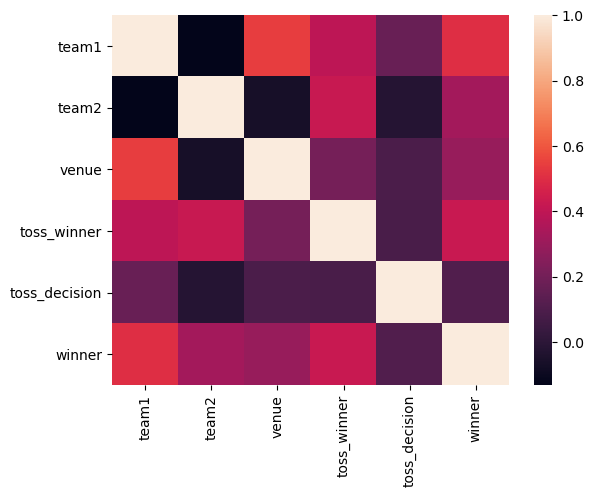

In [25]:
import seaborn as sns
sns.heatmap(df.corr())

In [26]:
X = df.drop(labels='winner', axis=1)
y = df['winner']

X = np.array(X)
y = np.array(y)

In [27]:
zeros, ones = 0, 0

for i in range(len(X)):
    if y[i] == X[i][0]:
        if zeros <= 250:
            y[i] = 0
            zeros += 1
        else:
            y[i] = 1
            ones += 1
            t = X[i][0]
            X[i][0] = X[i][1] 
            X[i][1] = t
    elif y[i] == X[i][1]:
        if ones <= 250:
            y[i] = 1
            ones += 1
        else:
            y[i] = 0
            zeros += 1
            t = X[i][0]
            X[i][0] = X[i][1] 
            X[i][1] = t


In [28]:
X = np.array(X , dtype='int32')
y = np.array(y , dtype='int32')

y = y.ravel()

print(np.unique(y, return_counts=True))
# now balanced dataset

(array([0, 1, 7]), array([251, 256,   3], dtype=int64))


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

In [30]:
alg1 = LogisticRegression(solver='liblinear')

start = time.time()
alg1.fit(X_train , y_train)
end = time.time()
total_time1 = end - start

y_pred1 = alg1.predict(X_test)

print('accuracy : ', alg1.score(X_test , y_test))
print('time : ' , total_time1)
print(classification_report(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))

accuracy :  0.5196078431372549
time :  0.012113094329833984
              precision    recall  f1-score   support

           0       0.53      0.46      0.49        52
           1       0.51      0.58      0.54        50

    accuracy                           0.52       102
   macro avg       0.52      0.52      0.52       102
weighted avg       0.52      0.52      0.52       102

[[24 28]
 [21 29]]


In [31]:
alg2 = RandomForestClassifier(n_estimators=60)

start = time.time()
alg2.fit(X_train , y_train)
end = time.time()
total_time2 = end - start

y_pred2 = alg2.predict(X_test)

print('accuracy : ', alg2.score(X_test , y_test))
print('time : ' , total_time2)
print(classification_report(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))

accuracy :  0.5294117647058824
time :  0.07212567329406738
              precision    recall  f1-score   support

           0       0.54      0.48      0.51        52
           1       0.52      0.58      0.55        50

    accuracy                           0.53       102
   macro avg       0.53      0.53      0.53       102
weighted avg       0.53      0.53      0.53       102

[[25 27]
 [21 29]]


In [32]:
alg3 = DecisionTreeClassifier(max_depth=1 , criterion='gini')

start = time.time()
alg3.fit(X_train , y_train)
end = time.time()
total_time3 = end - start

y_pred3 = alg3.predict(X_test)

print('accuracy : ', alg3.score(X_test , y_test))
print('time : ' , total_time3)
print(classification_report(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))

accuracy :  0.6470588235294118
time :  0.0
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        52
           1       0.65      0.60      0.63        50

    accuracy                           0.65       102
   macro avg       0.65      0.65      0.65       102
weighted avg       0.65      0.65      0.65       102

[[36 16]
 [20 30]]


In [33]:
alg4 = BernoulliNB()

start = time.time()
alg4.fit(X_train,y_train)
end = time.time()
total_time4 = end - start

y_pred4 = alg4.predict(X_test)

print('accuracy : ', alg4.score(X_test , y_test))
print('time : ' , total_time4)
print(classification_report(y_test , y_pred4))
print(confusion_matrix(y_test , y_pred4))

accuracy :  0.5588235294117647
time :  0.012028217315673828
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        52
           1       0.54      0.62      0.58        50

    accuracy                           0.56       102
   macro avg       0.56      0.56      0.56       102
weighted avg       0.56      0.56      0.56       102

[[26 26]
 [19 31]]


In [34]:
alg5 = GaussianNB()

start = time.time()
alg5.fit(X_train,y_train)
end = time.time()
total_time5 = end - start

y_pred5 = alg5.predict(X_test)

print('accuracy : ', alg5.score(X_test , y_test))
print('time : ' , total_time5)
print(classification_report(y_test , y_pred5))
print(confusion_matrix(y_test , y_pred5))

accuracy :  0.5490196078431373
time :  0.0
              precision    recall  f1-score   support

           0       0.60      0.52      0.56        52
           1       0.57      0.58      0.57        50
           7       0.00      0.00      0.00         0

    accuracy                           0.55       102
   macro avg       0.39      0.37      0.38       102
weighted avg       0.58      0.55      0.57       102

[[27 22  3]
 [18 29  3]
 [ 0  0  0]]


In [35]:
alg6 = MultinomialNB()

start = time.time()
alg6.fit(X_train,y_train)
end = time.time()
total_time6 = end - start

y_pred6 = alg6.predict(X_test)

print('accuracy : ', alg6.score(X_test , y_test))
print('time : ' , total_time6)
print(classification_report(y_test , y_pred6))
print(confusion_matrix(y_test , y_pred6))

accuracy :  0.46078431372549017
time :  0.002338886260986328
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        52
           1       0.46      0.48      0.47        50
           7       0.00      0.00      0.00         0

    accuracy                           0.46       102
   macro avg       0.32      0.31      0.31       102
weighted avg       0.48      0.46      0.47       102

[[23 28  1]
 [23 24  3]
 [ 0  0  0]]


In [37]:
x_axis = []
y_axis = []
for k in range(1, 26, 2):
    clf = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(clf, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=0))
    x_axis.append(k)
    y_axis.append(score.mean())

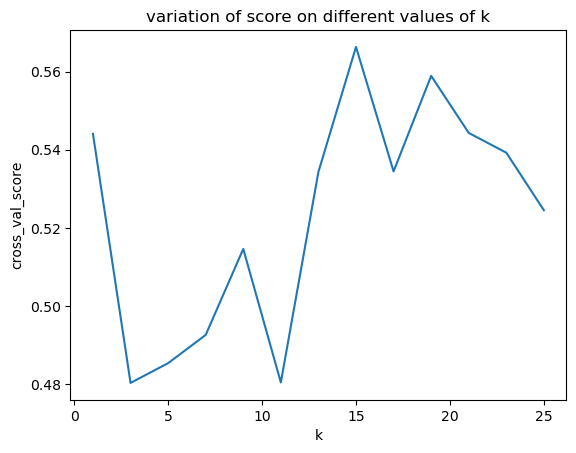

In [38]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)
plt.xlabel("k")
plt.ylabel("cross_val_score")
plt.title("variation of score on different values of k")
plt.show()

In [39]:
alg7 = KNeighborsClassifier(n_neighbors=19, weights='distance', algorithm='auto', p=2, metric='minkowski')

start = time.time()
alg7.fit(X_train, y_train)
end = time.time()
total_time7 = end - start

y_pred7 = alg7.predict(X_test)

print('accuracy : ', alg7.score(X_test , y_test))
print('time : ' , total_time7)
print(classification_report(y_test , y_pred7))
print(confusion_matrix(y_test , y_pred7))

accuracy :  0.5686274509803921
time :  0.0025320053100585938
              precision    recall  f1-score   support

           0       0.57      0.60      0.58        52
           1       0.56      0.54      0.55        50

    accuracy                           0.57       102
   macro avg       0.57      0.57      0.57       102
weighted avg       0.57      0.57      0.57       102

[[31 21]
 [23 27]]


In [40]:
clf = SVC(kernel='rbf')
grid = {'C': [1e2,1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma': [1e-3, 5e-4, 1e-4, 5e-3]}

alg8 = GridSearchCV(clf, grid)

start = time.time()
alg8.fit(X_train, y_train)
end = time.time()
total_time8 = end - start

y_pred8 = alg8.predict(X_test)

print(alg8.best_estimator_)

print('accuracy : ', alg8.score(X_test , y_test))
print('time : ' , total_time8)
print(classification_report(y_test , y_pred8))
print(confusion_matrix(y_test , y_pred8))

SVC(C=100000.0, gamma=0.005)
accuracy :  0.5784313725490197
time :  22.581387042999268
              precision    recall  f1-score   support

           0       0.62      0.48      0.54        52
           1       0.56      0.68      0.61        50
           7       0.00      0.00      0.00         0

    accuracy                           0.58       102
   macro avg       0.39      0.39      0.39       102
weighted avg       0.59      0.58      0.58       102

[[25 27  0]
 [15 34  1]
 [ 0  0  0]]


In [41]:
alg9 = LinearSVC(multi_class='crammer_singer')

start = time.time()
alg9.fit(X_train, y_train)
end = time.time()
total_time9 = end - start

y_pred9 = alg9.predict(X_test)

print('accuracy : ', alg9.score(X_test , y_test))
print('time : ' , total_time9)
print(classification_report(y_test , y_pred9))
print(confusion_matrix(y_test , y_pred9))

accuracy :  0.5490196078431373
time :  0.03529834747314453
              precision    recall  f1-score   support

           0       0.57      0.44      0.50        52
           1       0.53      0.66      0.59        50

    accuracy                           0.55       102
   macro avg       0.55      0.55      0.54       102
weighted avg       0.55      0.55      0.54       102

[[23 29]
 [17 33]]


In [42]:
ridge = RidgeClassifier()

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
alg10=GridSearchCV(ridge,parameters)

start = time.time()
alg10.fit(X_train, y_train)
end = time.time()
total_time10 = end - start

y_pred10 = alg10.predict(X_test)

print('accuracy : ', alg10.score(X_test , y_test))
print('time : ' , total_time10)
print(classification_report(y_test , y_pred10))
print(confusion_matrix(y_test , y_pred10))

accuracy :  0.5
time :  0.10854411125183105
              precision    recall  f1-score   support

           0       0.51      0.40      0.45        52
           1       0.49      0.60      0.54        50

    accuracy                           0.50       102
   macro avg       0.50      0.50      0.50       102
weighted avg       0.50      0.50      0.50       102

[[21 31]
 [20 30]]


In [43]:
test = np.array([2, 4, 1, 1, 1]).reshape(1,-1)

print('alg1 : ' , alg1.predict(test))
print('alg2 : ' , alg2.predict(test))
print('alg3 : ' , alg3.predict(test))
print('alg4 : ' , alg4.predict(test))
print('alg5 : ' , alg5.predict(test))
print('alg6 : ' , alg6.predict(test))
print('alg7 : ' , alg7.predict(test))
print('alg8 : ' , alg8.predict(test))
print('alg9 : ' , alg9.predict(test))
print('alg10 :' , alg10.predict(test))

alg1 :  [0]
alg2 :  [1]
alg3 :  [1]
alg4 :  [0]
alg5 :  [1]
alg6 :  [1]
alg7 :  [1]
alg8 :  [0]
alg9 :  [0]
alg10 : [1]


In [44]:
test = np.array([4, 2, 1, 0, 1]).reshape(1,-1)

print('alg1 : ' , alg1.predict(test))
print('alg2 : ' , alg2.predict(test))
print('alg3 : ' , alg3.predict(test))
print('alg4 : ' , alg4.predict(test))
print('alg5 : ' , alg5.predict(test))
print('alg6 : ' , alg6.predict(test))
print('alg7 : ' , alg7.predict(test))
print('alg8 : ' , alg8.predict(test))
print('alg9 : ' , alg9.predict(test))
print('alg10 :' , alg10.predict(test))

alg1 :  [0]
alg2 :  [0]
alg3 :  [0]
alg4 :  [0]
alg5 :  [0]
alg6 :  [0]
alg7 :  [1]
alg8 :  [1]
alg9 :  [0]
alg10 : [0]


In [45]:
df_model=pd.DataFrame({
'Model_Applied':['Logistic_Regression', 'Random_Forest', 'Decision_tree', 'BernoulliNB', 'GausianNB', 'MultinomialNB', 'KNN', 'SVC', 'Linear_SVC', 'Ridge_Classifier'],
'Accuracy':[alg1.score(X_test,y_test), alg2.score(X_test,y_test), alg3.score(X_test,y_test), alg4.score(X_test,y_test),
            alg5.score(X_test,y_test), alg6.score(X_test,y_test), alg7.score(X_test,y_test), alg8.score(X_test,y_test),
            alg9.score(X_test,y_test), alg10.score(X_test,y_test)],
'Training_Time':[total_time1, total_time2, total_time3, total_time4, total_time5, total_time6, total_time7, total_time8, 
                 total_time9, total_time10]})

In [46]:
df_model

,Model_Applied,Accuracy,Training_Time
0,Logistic_Regression,0.519608,0.012113
1,Random_Forest,0.529412,0.072126
2,Decision_tree,0.647059,0.000000
3,BernoulliNB,0.558824,0.012028
4,GausianNB,0.549020,0.000000
5,MultinomialNB,0.460784,0.002339
6,KNN,0.568627,0.002532
7,SVC,0.578431,22.581387
8,Linear_SVC,0.549020,0.035298
9,Ridge_Classifier,0.500000,0.108544


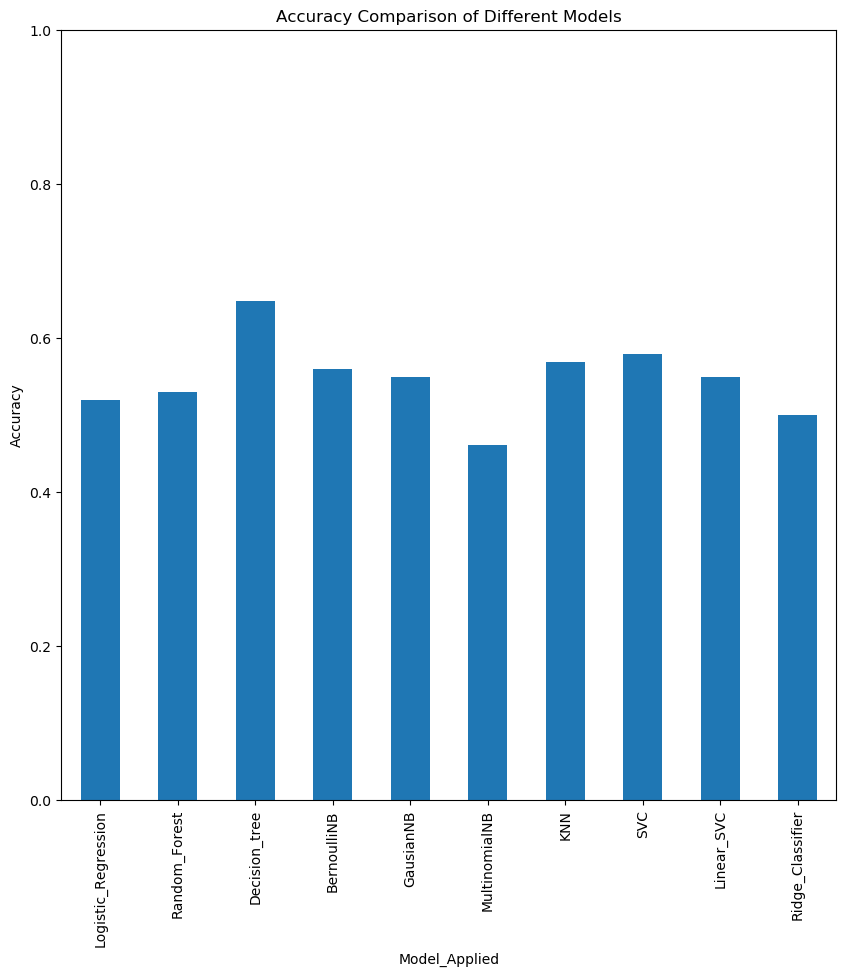

In [47]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize=(10, 10))


df_model.plot(kind='bar', x='Model_Applied', y='Accuracy', ylim=[0, 1], ax=ax, legend=False)


ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Different Models')


plt.show()


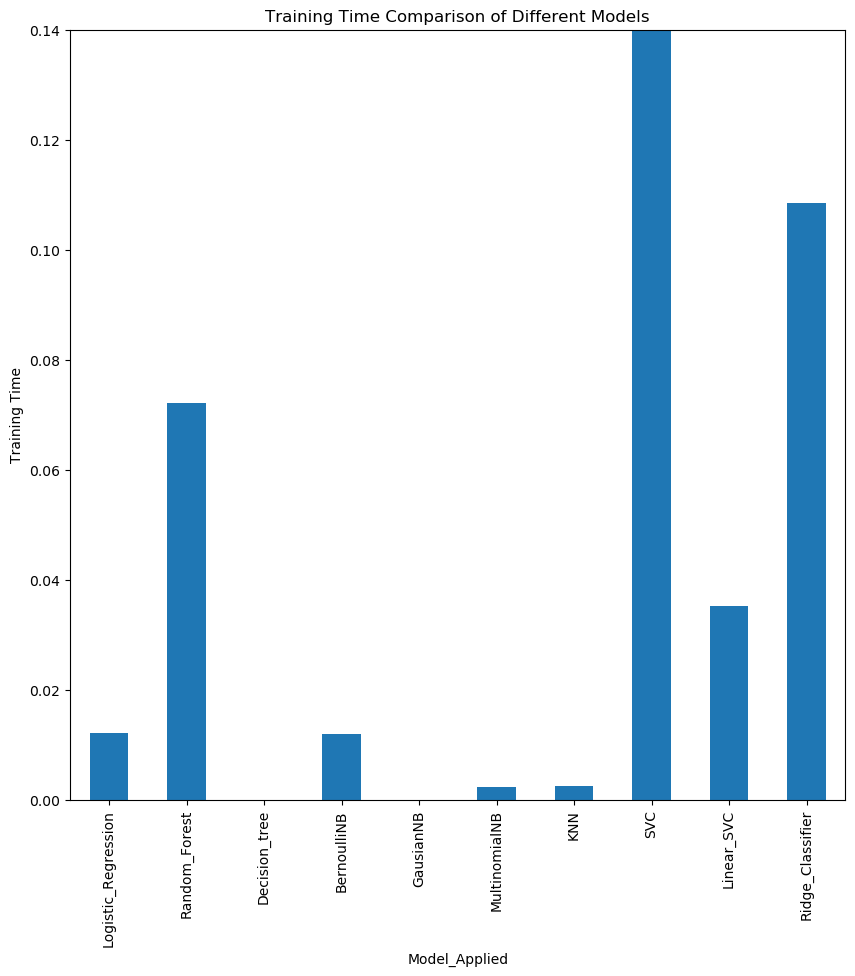

In [48]:
import matplotlib.pyplot as plt




fig, ax = plt.subplots(figsize=(10, 10))


df_model.plot(kind='bar', x='Model_Applied', y='Training_Time', ylim=[0, 0.14], ax=ax, legend=False)


ax.set_ylabel('Training Time')
ax.set_title('Training Time Comparison of Different Models')


plt.show()


In [49]:
import pickle as pkl

# List of your algorithms
algorithms = [alg1, alg2, alg3, alg4, alg5, alg6, alg7, alg8, alg9, alg10]

# Save each algorithm
for i, alg in enumerate(algorithms, start=1):
    with open(f'Winner{i}.pkl', 'wb') as f:
        pkl.dump(alg, f)

# Load each algorithm
loaded_models = []
for i in range(1, 11):
    with open(f'Winner{i}.pkl', 'rb') as f:
        loaded_models.append(pkl.load(f))

# Now, loaded_models is a list containing all your loaded models
